# Titanic Case Study

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
from pycaret.datasets import get_data
dataset = get_data('train')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#check the shape of data
dataset.shape

(891, 12)

In [7]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (846, 12)
Unseen Data For Predictions: (45, 12)


In [8]:
from pycaret.classification import *

In [9]:
exp_clf101 = setup(data = data, target = 'Survived')

,Description,Value
0,session_id,342
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(846, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8259,0.0000,0.7543,0.8029,0.7760,0.6338,0.6366,0.0310
lr,Logistic Regression,0.8226,0.8746,0.7422,0.8005,0.7681,0.6252,0.6285,2.0190
rf,Random Forest Classifier,0.8194,0.8575,0.7170,0.8167,0.7602,0.6166,0.6232,0.1740
dt,Decision Tree Classifier,0.8193,0.8066,0.7455,0.7946,0.7678,0.6199,0.6223,0.0320
gbc,Gradient Boosting Classifier,0.8193,0.8707,0.7208,0.8085,0.7602,0.6161,0.6206,0.2480
et,Extra Trees Classifier,0.8193,0.8598,0.7293,0.8058,0.7634,0.6180,0.6222,0.2120
lightgbm,Light Gradient Boosting Machine,0.8023,0.8380,0.7118,0.7799,0.7424,0.5826,0.5860,0.3050
ada,Ada Boost Classifier,0.7956,0.8519,0.7118,0.7634,0.7336,0.5683,0.5723,0.1180
lda,Linear Discriminant Analysis,0.6402,0.6146,0.5042,0.5516,0.5233,0.2368,0.2387,0.1660
knn,K Neighbors Classifier,0.6082,0.6125,0.3850,0.5052,0.4347,0.1455,0.1485,0.0600


In [11]:
print(best_model)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=342, solver='auto',
                tol=0.001)


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9167,0.9028,0.8333,0.9524,0.8889,0.8227,0.8274
1,0.7167,0.7083,0.6667,0.6400,0.6531,0.4138,0.4140
2,0.8305,0.8179,0.7500,0.8182,0.7826,0.6441,0.6458
3,0.7288,0.7256,0.7083,0.6538,0.6800,0.4454,0.4464
4,0.8983,0.8881,0.8333,0.9091,0.8696,0.7865,0.7885
5,0.7966,0.7893,0.7500,0.7500,0.7500,0.5786,0.5786
6,0.8136,0.7923,0.6957,0.8000,0.7442,0.5986,0.6023
7,0.8136,0.7923,0.6957,0.8000,0.7442,0.5986,0.6023
8,0.8814,0.8792,0.8696,0.8333,0.8511,0.7525,0.7530
9,0.7966,0.7705,0.6522,0.7895,0.7143,0.5586,0.5647


In [14]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=342, splitter='best')


In [15]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6167,0.5990,0.4583,0.5238,0.4889,0.1844,0.1854
1,0.5500,0.5492,0.2500,0.4000,0.3077,0.0000,0.0000
2,0.5424,0.5357,0.2917,0.4118,0.3415,0.0062,0.0065
3,0.6610,0.6601,0.3750,0.6429,0.4737,0.2484,0.2681
4,0.7119,0.7429,0.5833,0.6667,0.6222,0.3910,0.3933
5,0.6441,0.6048,0.5000,0.5714,0.5333,0.2477,0.2492
6,0.5593,0.5827,0.2609,0.4000,0.3158,0.0116,0.0122
7,0.5763,0.5423,0.3478,0.4444,0.3902,0.0729,0.0742
8,0.6610,0.6938,0.4783,0.5789,0.5238,0.2643,0.2672
9,0.5593,0.6141,0.3043,0.4118,0.3500,0.0279,0.0286


In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9086,0.6667,0.8889,0.7619,0.6377,0.6533
1,0.7500,0.7650,0.6250,0.7143,0.6667,0.4681,0.4708
2,0.7797,0.8101,0.6667,0.7619,0.7111,0.5343,0.5374
3,0.7288,0.8024,0.6667,0.6667,0.6667,0.4381,0.4381
4,0.9153,0.9435,0.8333,0.9524,0.8889,0.8209,0.8257
5,0.8136,0.8196,0.6250,0.8824,0.7317,0.5951,0.6159
6,0.8475,0.8961,0.6957,0.8889,0.7805,0.6662,0.6780
7,0.7797,0.7880,0.7826,0.6923,0.7347,0.5475,0.5505
8,0.8983,0.9360,0.8696,0.8696,0.8696,0.7862,0.7862
9,0.8475,0.9052,0.7391,0.8500,0.7907,0.6716,0.6757


In [17]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9000,0.9462,0.8750,0.8750,0.8750,0.7917,0.7917
1,0.7500,0.7807,0.6667,0.6957,0.6809,0.4755,0.4758
2,0.7797,0.7786,0.7917,0.7037,0.7451,0.5522,0.5552
3,0.7797,0.8006,0.6667,0.7619,0.7111,0.5343,0.5374
4,0.8475,0.9119,0.8333,0.8000,0.8163,0.6860,0.6864
5,0.8305,0.8595,0.7500,0.8182,0.7826,0.6441,0.6458
6,0.7966,0.8110,0.6957,0.7619,0.7273,0.5656,0.5671
7,0.8136,0.8502,0.8261,0.7308,0.7755,0.6171,0.6205
8,0.8644,0.9287,0.8261,0.8261,0.8261,0.7150,0.7150
9,0.7966,0.8551,0.7391,0.7391,0.7391,0.5725,0.5725


In [18]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=342, splitter='best')


In [19]:
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6833,0.5862,0.2917,0.7778,0.4242,0.2636,0.3239
1,0.6667,0.5706,0.2083,0.8333,0.3333,0.2063,0.2948
2,0.5593,0.5649,0.0833,0.3333,0.1333,-0.0351,-0.0503
3,0.6610,0.5827,0.2500,0.7500,0.3750,0.2154,0.2767
4,0.6780,0.7262,0.2917,0.7778,0.4242,0.2601,0.3204
5,0.6441,0.5643,0.2083,0.7143,0.3226,0.1701,0.2297
6,0.6441,0.5839,0.1304,0.7500,0.2222,0.1207,0.1992
7,0.6102,0.5791,0.2174,0.5000,0.3030,0.0874,0.1020
8,0.6441,0.6105,0.1739,0.6667,0.2759,0.1366,0.1910
9,0.6102,0.5556,0.2174,0.5000,0.3030,0.0874,0.1020


In [20]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=22, p=2,
                     weights='uniform')


In [21]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8833,0.9213,0.8333,0.8696,0.8511,0.7552,0.7557
1,0.7333,0.7558,0.7083,0.6538,0.6800,0.4521,0.4531
2,0.7627,0.8202,0.7500,0.6923,0.7200,0.5147,0.5159
3,0.7797,0.8167,0.7500,0.7200,0.7347,0.5464,0.5468
4,0.8305,0.9143,0.8333,0.7692,0.8000,0.6533,0.6549
5,0.7966,0.8190,0.7500,0.7500,0.7500,0.5786,0.5786
6,0.8136,0.8176,0.7391,0.7727,0.7556,0.6050,0.6054
7,0.8475,0.8116,0.8261,0.7917,0.8085,0.6818,0.6823
8,0.8814,0.9251,0.9130,0.8077,0.8571,0.7563,0.7605
9,0.8136,0.8521,0.7391,0.7727,0.7556,0.6050,0.6054


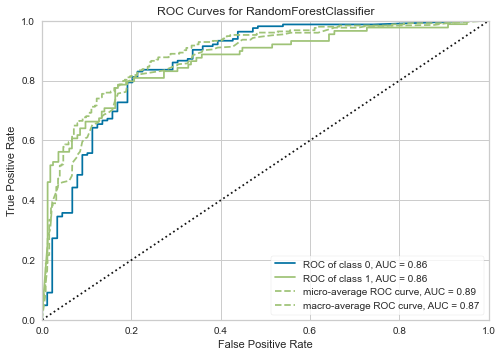

In [22]:
plot_model(tuned_rf, plot = 'auc')

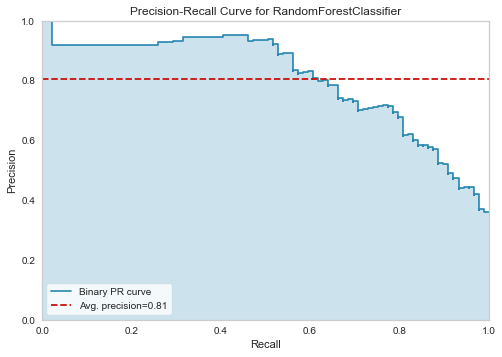

In [23]:
plot_model(tuned_rf, plot = 'pr')

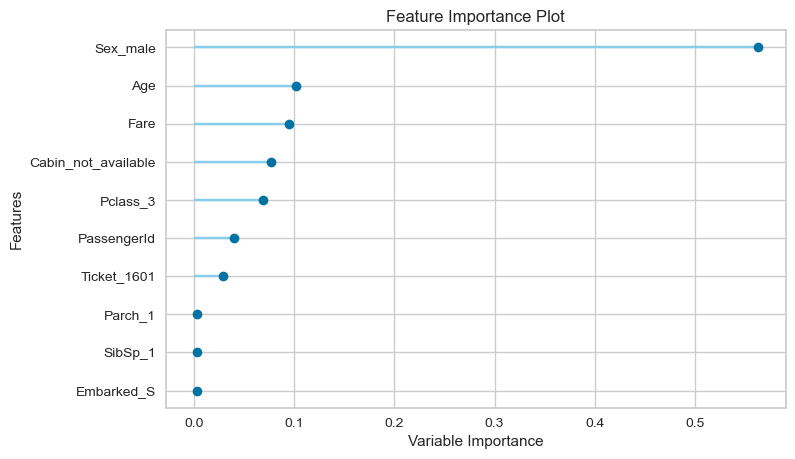

In [24]:
plot_model(tuned_rf, plot='feature')

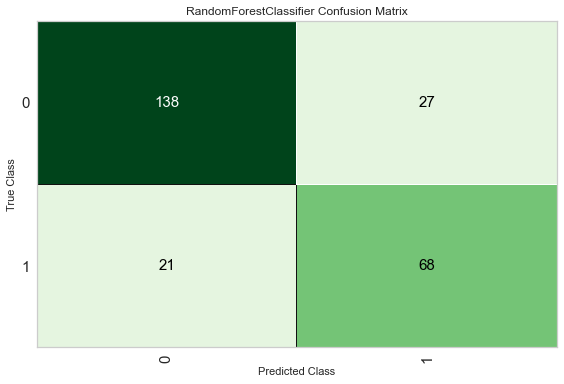

In [25]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [27]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8110,0.8646,0.7640,0.7158,0.7391,0.5912,0.5920


In [28]:
final_rf = finalize_model(tuned_rf)

In [29]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=7, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=342, verbose=0,
                       warm_start=False)


In [30]:
predict_model(final_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8346,0.9198,0.7978,0.7474,0.7717,0.6423,0.6432


In [31]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,0.8009
1,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,0,0.8137
2,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C,0,0.8021
3,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S,1,0.6249
4,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,0.8317


In [32]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

KeyError: 'default'

In [ ]:
save_model(final_rf,'Final RF Model 11Nov2020')

In [ ]:
saved_final_rf = load_model('Final RF Model 11Nov2020')

In [ ]:
#############################################3

In [ ]:
data = ["Age", "Gender"]
target = ["Survived"]

In [ ]:
#Missing Value
rata = train["Age"].mean()
train['Age'] = train['Age'].fillna(rata)

In [ ]:
#train.info()

In [ ]:
#Convert Data
sex = {'male' : 1, 'female' : 0}
train['Gender'] = train['Sex'].map(sex)

In [ ]:
#train.info()

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#dt=KNeighborsClassifier(n_neighbors=5)

#Learning
#dt.fit(train[data],train[target])

from sklearn.ensemble import RandomForestClassifier
dt=RandomForestClassifier()

#Learning
dt.fit(train[data],train[target])

In [ ]:
test.info()

In [ ]:
#Missing Value
test['Age'] = test['Age'].fillna(rata)

#Convert Data
sex = {'male' : 1, 'female' : 0}
test['Gender'] = test['Sex'].map(sex)

In [ ]:
predict = dt.predict(test[data])
predict.shape

In [ ]:
truth=pd.read_csv("gender_submission.csv")
truth=truth[target]
truth.shape

In [ ]:
from sklearn.metrics import precision_score

print("Precision:", precision_score(predict, truth))